<a href="https://colab.research.google.com/github/norgaston/laboratorio2-mlbd/blob/main/Laboratorio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 2 - Clasificador de canciones de Spotify**

ELEMENTOS DE APRENDIZAJE DE MÁQUINA Y BIG DATA

Carrera: T.U. TECNOLOGÍAS DE PROGRAMACIÓN SEDE PUNTA ALTA
Facultad: Facultad de la Micro, Pequeña y Mediana Empresa (UPSO)
Docente: Valentín Barco
Cuatrimestre/Año: 2° Cuatrimestre 2023

En este laboratorio, nos enfocaremos en un conjunto de datos repleto de atributos clave de
distintas canciones. La meta es establecer a través de herramientas de aprendizaje
automático, un clasificador que pueda predecir las inclinaciones musicales de un individuo y
predecir si disfrutará o no de una determinada canción.

**Integrantes del Grupo 12: Dolores Ponce y Gaston Ponce**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importa las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Carga los datos en un DataFrame de Pandas
ruta = '/content/Canciones_Spotify.csv' # ruta desde donde voy a cargar el dataset
data = pd.read_csv(ruta, encoding='latin-1')
data = data.dropna()
# Elimino la primera columna (columna 0) utilizando el método drop
data.drop('Unnamed: 0', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [3]:
# Función para graficar la matriz de confusión con valores
def plot_confusion_matrix_with_values(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.colorbar()
    classes = ['No Gusta', 'Gusta']
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(cm[i, j]), horizontalalignment='center', verticalalignment='center', color='black', fontsize=15)
    plt.xticks([0, 1], classes, rotation=45)
    plt.yticks([0, 1], classes)
    plt.tight_layout()
    plt.ylabel('Canciones Verdaderas')
    plt.xlabel('Canciones Predichas')

# Función para graficar la curva ROC y calcular el AUC
def plot_roc_curve(y_true, y_pred, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')

In [4]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X = data.drop(['target', 'song_title', 'artist'], axis=1)
y = data['target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Entrenar modelos
knn_model = KNeighborsClassifier(n_neighbors=5)
svm_model = SVC(kernel='linear')
decision_tree_model = DecisionTreeClassifier(max_depth=5)
naive_bayes_model = GaussianNB()

knn_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
naive_bayes_model.fit(X_train, y_train)

# Realizar predicciones
knn_predictions = knn_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)
decision_tree_predictions = decision_tree_model.predict(X_test)
naive_bayes_predictions = naive_bayes_model.predict(X_test)

# **Evaluación de los modelos**

**K-Nearest Neighbors**

K-Nearest Neighbors:
[[114  92]
 [ 85 113]]
              precision    recall  f1-score   support

           0       0.57      0.55      0.56       206
           1       0.55      0.57      0.56       198

    accuracy                           0.56       404
   macro avg       0.56      0.56      0.56       404
weighted avg       0.56      0.56      0.56       404



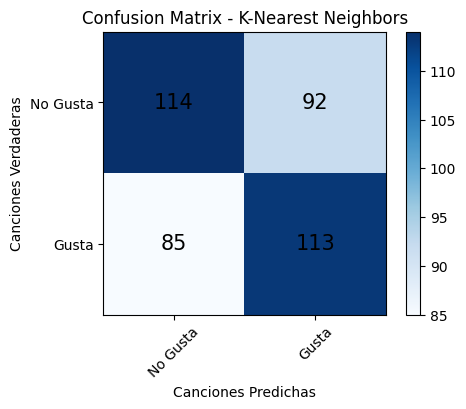

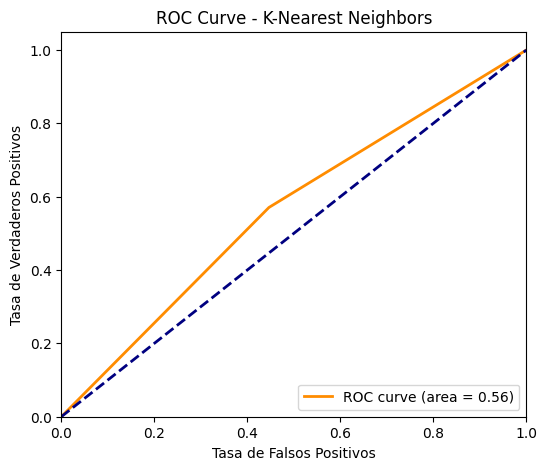

In [5]:
print("K-Nearest Neighbors:")
print(confusion_matrix(y_test, knn_predictions))
print(classification_report(y_test, knn_predictions))

plot_confusion_matrix_with_values(y_test, knn_predictions, 'K-Nearest Neighbors')
plt.show()
plot_roc_curve(y_test, knn_predictions, 'K-Nearest Neighbors')
plt.show()

**Support Vector Machine**

Support Vector Machine:
[[108  98]
 [ 82 116]]
              precision    recall  f1-score   support

           0       0.57      0.52      0.55       206
           1       0.54      0.59      0.56       198

    accuracy                           0.55       404
   macro avg       0.56      0.56      0.55       404
weighted avg       0.56      0.55      0.55       404



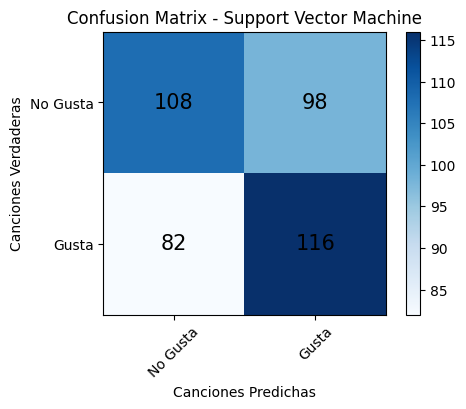

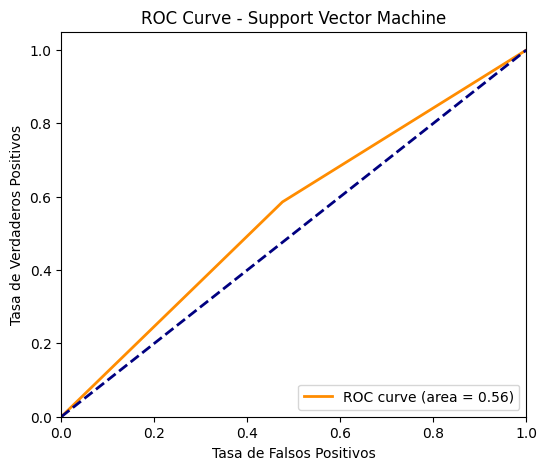

In [6]:
print("Support Vector Machine:")
print(confusion_matrix(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))

plot_confusion_matrix_with_values(y_test, svm_predictions, 'Support Vector Machine')
plt.show()
plot_roc_curve(y_test, svm_predictions, 'Support Vector Machine')
plt.show()

**Decision Tree**

Decision Tree:
[[142  64]
 [ 52 146]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       206
           1       0.70      0.74      0.72       198

    accuracy                           0.71       404
   macro avg       0.71      0.71      0.71       404
weighted avg       0.71      0.71      0.71       404



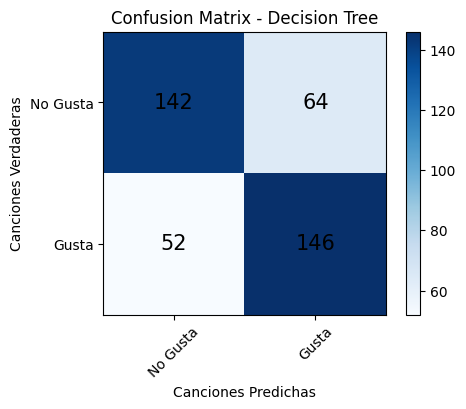

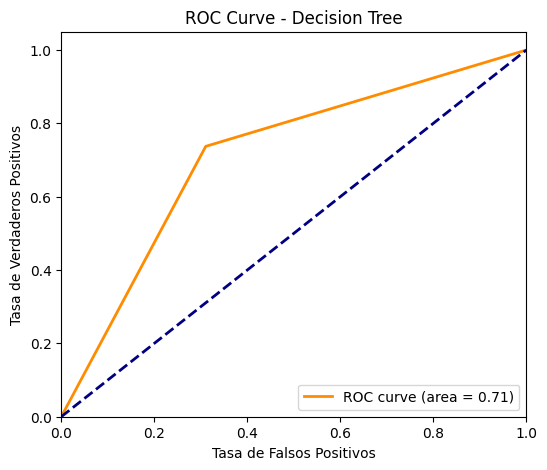

In [7]:
print("Decision Tree:")
print(confusion_matrix(y_test, decision_tree_predictions))
print(classification_report(y_test, decision_tree_predictions))

plot_confusion_matrix_with_values(y_test, decision_tree_predictions, 'Decision Tree')
plt.show()
plot_roc_curve(y_test, decision_tree_predictions, 'Decision Tree')
plt.show()

**Naive Bayes**

Naive Bayes:
[[126  80]
 [ 81 117]]
              precision    recall  f1-score   support

           0       0.61      0.61      0.61       206
           1       0.59      0.59      0.59       198

    accuracy                           0.60       404
   macro avg       0.60      0.60      0.60       404
weighted avg       0.60      0.60      0.60       404



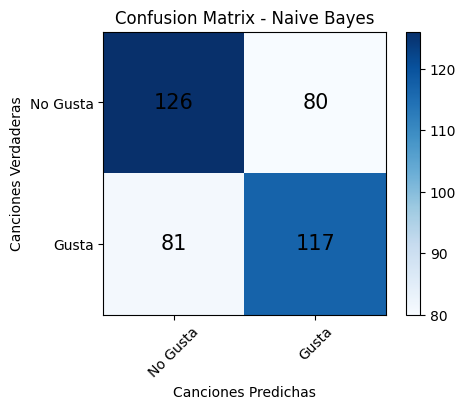

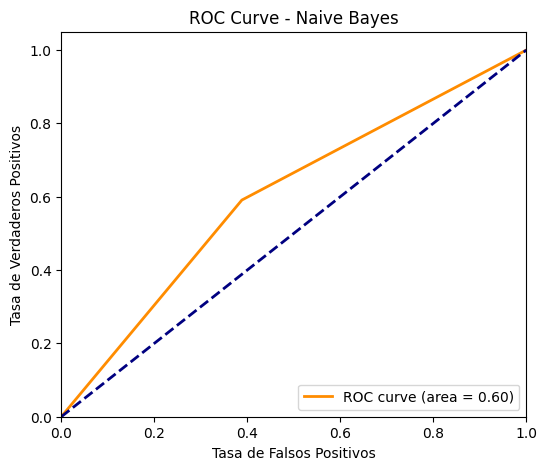

In [8]:
print("Naive Bayes:")
print(confusion_matrix(y_test, naive_bayes_predictions))
print(classification_report(y_test, naive_bayes_predictions))

plot_confusion_matrix_with_values(y_test, naive_bayes_predictions, 'Naive Bayes')
plt.show()
plot_roc_curve(y_test, naive_bayes_predictions, 'Naive Bayes')
plt.show()

**Votación Mayoritaria**

Ensamble (Votación Mayoritaria):
[[158  48]
 [ 95 103]]
              precision    recall  f1-score   support

           0       0.62      0.77      0.69       206
           1       0.68      0.52      0.59       198

    accuracy                           0.65       404
   macro avg       0.65      0.64      0.64       404
weighted avg       0.65      0.65      0.64       404



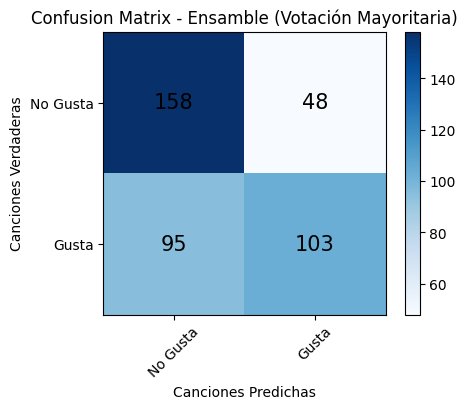

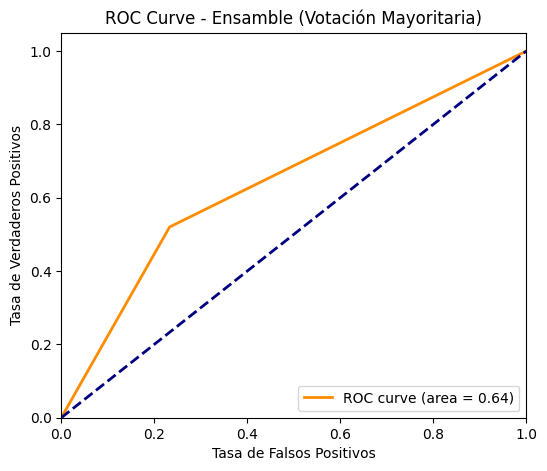

In [9]:
# Ensamble de modelos (Votación mayoritaria)
ensemble_model = VotingClassifier(estimators=[('KNN', knn_model), ('SVM', svm_model), ('DecisionTree', decision_tree_model), ('NaiveBayes', naive_bayes_model)], voting='hard')
ensemble_model.fit(X_train, y_train)
ensemble_predictions = ensemble_model.predict(X_test)

# Evaluar el ensamble
print("Ensamble (Votación Mayoritaria):")
print(confusion_matrix(y_test, ensemble_predictions))
print(classification_report(y_test, ensemble_predictions))

plot_confusion_matrix_with_values(y_test, ensemble_predictions, 'Ensamble (Votación Mayoritaria)')
plt.show()
plot_roc_curve(y_test, ensemble_predictions, 'Ensamble (Votación Mayoritaria)')
plt.show()

# **Conclusiones:**

En esta tabla, puedes ver claramente cómo cada modelo se desempeña en términos de precisión, recall, f1-score y exactitud para ambas clases.

---



| Modelo                        | Precisión (Clase 0) | Recall (Clase 0) | F1-Score (Clase 0) | Precisión (Clase 1) | Recall (Clase 1) | F1-Score (Clase 1) | F1-Score Promedio | Exactitud |
|-------------------------------|---------------------|-------------------|--------------------|---------------------|-------------------|--------------------|--------------------|-----------|
| Decision Tree                 | 0.73                | 0.69              | 0.71               | 0.70                | 0.74              | 0.72               | 0.72               | 0.72      |
| Ensamble (Votación Mayoritaria)| 0.62                | 0.77              | 0.69               | 0.68                | 0.52              | 0.59               | 0.64               | 0.65      |
| Naive Bayes                   | 0.61                | 0.61              | 0.61               | 0.59                | 0.59              | 0.59               | 0.60               | 0.60      |
| K-Nearest Neighbors (KNN)     | 0.57                | 0.55              | 0.56               | 0.55                | 0.57              | 0.56               | 0.56               | 0.56      |
| Support Vector Machine (SVM)  | 0.57                | 0.52              | 0.55               | 0.54                | 0.59              | 0.56               | 0.55               | 0.55      |


El modelo Decision Tree tiene el mejor rendimiento en general, seguido por el modelo de Ensamble (Votación Mayoritaria). Las otras opciones, como K-Nearest Neighbors, Support Vector Machine y Naive Bayes, muestran un rendimiento inferior en este escenario. La elección del modelo dependerá de los objetivos específicos del proyecto y de las características del conjunto de datos.

# **Prueba del modelo con nuevos datos**

In [10]:
# Carga tus datos en un DataFrame de Pandas
ruta = '/content/new_songs.csv'  # Ruta desde donde voy a cargar el dataset
data = pd.read_csv(ruta, encoding='latin-1')
data = data.dropna()
# Eliminar la primera columna (columna 0) utilizando el método drop
data.drop('Unnamed: 0', axis=1, inplace=True)
# Extrae las características y los nombres de las canciones
X = data.drop(['target', 'song_title', 'artist'], axis=1)
canciones = data['song_title']

# Realiza predicciones en las nuevas canciones
new_predictions = decision_tree_model.predict(X)
#new_predictions = knn_model.predict(X)
#new_predictions = svm_model.predict(X)
#new_predictions = naive_bayes_model.predict(X)

# Cuenta las predicciones positivas (gusto del usuario)
cantidad_gusto = sum(new_predictions)
total_canciones = len(new_predictions)

# Calcula la cantidad de canciones que no le gustan al usuario
cantidad_no_gusto = total_canciones - cantidad_gusto

# Calcula el porcentaje de gusto y el porcentaje de no gusto con 2 decimales
porcentaje_gusto = round((cantidad_gusto / total_canciones) * 100, 2)
porcentaje_no_gusto = round((cantidad_no_gusto / total_canciones) * 100, 2)

# Imprime la cantidad total, la cantidad de no gusto y los porcentajes
print(f'Cantidad total de canciones: {total_canciones}')
print(f'Cantidad de canciones que le gustarían al usuario: {cantidad_gusto}')
print(f'Cantidad de canciones que no le gustarían al usuario: {cantidad_no_gusto}')
print(f'Porcentaje de gusto: {porcentaje_gusto}%')
print(f'Porcentaje de no gusto: {porcentaje_no_gusto}%')

Cantidad total de canciones: 2017
Cantidad de canciones que le gustarían al usuario: 1046
Cantidad de canciones que no le gustarían al usuario: 971
Porcentaje de gusto: 51.86%
Porcentaje de no gusto: 48.14%


In [11]:
# Muestra el nombre de la canción junto al resultado de gusto (son muchas)
for i in range(len(new_predictions)):
    gusto = 'le gustará al usuario' if new_predictions[i] == 1 else 'No le gustará al usuario'
    print(f'Canción: {canciones.iloc[i]}, predicción: {gusto}')

Canción: Mask Off, predicción: le gustará al usuario
Canción: Redbone, predicción: le gustará al usuario
Canción: Xanny Family, predicción: le gustará al usuario
Canción: Master Of None, predicción: le gustará al usuario
Canción: Parallel Lines, predicción: le gustará al usuario
Canción: Sneakinâ, predicción: le gustará al usuario
Canción: Childs Play, predicción: le gustará al usuario
Canción: GyÃ¶ngyhajÃº lÃ¡ny, predicción: le gustará al usuario
Canción: I've Seen Footage, predicción: No le gustará al usuario
Canción: Digital Animal, predicción: le gustará al usuario
Canción: Subways - In Flagranti Extended Edit, predicción: le gustará al usuario
Canción: Donme Dolap - Baris K Edit, predicción: le gustará al usuario
Canción: Cemalim, predicción: le gustará al usuario
Canción: One Night, predicción: le gustará al usuario
Canción: Oh lala, predicción: No le gustará al usuario
Canción: Char, predicción: le gustará al usuario
Canción: World In Motion, predicción: No le gustará al usuar